# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Yields
### Data analysis
#### Multiple candidates 
##### nCandidate2 computation after the selection applied

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys 
import uncertainties as un
import mplhep
import pandas as pd
from particle import Particle
import matplotlib.pyplot as plt
import os
#ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh


print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()
mplhep.styles.use(mplhep.styles.LHCb2)

%jsroot on

Welcome to JupyROOT 6.28/04
2024-05-08 19:42:42.912543
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")

Graphs directory already exists
root_files directory already exists


## RDataFrame definition

In [ ]:
Year = "2018"
Polarity = "MagUp"
Data_name = "MagU16"

Data_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/{0}/{1}/'.format(Polarity, Year)

Data_files = "DsJ_Data_{0}_*.root".format(Data_name)
dtt = "DsGammaTuple"

tdf_data = ROOT.RDataFrame(dtt+"/DecayTree", Data_path+Data_files)
tdf_data = tdf_data.Define("DsgM", "Dsg_M-Ds_M+1969")
tdf_data = tdf_data.Define("dR_Dsg", "deltaR(Ds_ETA, Ds_PHI, gamma_ETA, gamma_PHI)")
tdf_data = tdf_data.Define("Ds_log10_IPCHI2", "log10(Ds_IPCHI2_OWNPV)")
tdf_data = tdf_data.Define("PVZ_1PV", "PVZ[0]")

trig_columns = ["Ds_L0HadronDecision_TOS", "Dsg_L0Global_TIS",
                "Ds_Hlt1TrackMVADecision_TOS", "Ds_Hlt1TwoTrackMVADecision_TOS",
                "Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS"]

for var in trig_columns:
    tdf_data = tdf_data.Define("{0}_int".format(var), "static_cast<int>({0})".format(var))

: 

: 

: 

## Selection RDF

In [9]:
L0_cuts = "(Ds_L0HadronDecision_TOS_int == 1 | Dsg_L0Global_TIS_int == 1)"
HLT1_cuts = "(Ds_Hlt1TrackMVADecision_TOS_int == 1 | Ds_Hlt1TwoTrackMVADecision_TOS_int == 1)"
HLT2_cuts = "(Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS_int == 1)"

Trigger_cuts = "{0} && {1} && {2}".format(L0_cuts, HLT1_cuts, HLT2_cuts)

sel = "gamma_PT > 1200 && gamma_CL > 0.7 && abs(Ds_M-1969) < 20 && DsgM < 3400"
nPVs_req = "nPVs == 1"

tdf_data_sel = tdf_data.Filter("{0} && {1} && {2}".format(sel, nPVs_req, Trigger_cuts))

tdf_data_sel.Display({"runNumber", "eventNumber", "Ds_M", "gamma_PT", "DsgM", "PVZ_1PV"}, 30).Print()

+------+-----------+-----------+-------------+-----------+-----------+-----------+
| Row  | DsgM      | runNumber | eventNumber | PVZ_1PV   | Ds_M      | gamma_PT  | 
+------+-----------+-----------+-------------+-----------+-----------+-----------+
| 8    | 2433.2812 | 180006    | 2872221229  | 28.0213f  | 1961.1137 | 1449.3306 | 
+------+-----------+-----------+-------------+-----------+-----------+-----------+
| 9    | 2373.4276 | 180006    | 2872221229  | 28.0213f  | 1961.1137 | 1354.4170 | 
+------+-----------+-----------+-------------+-----------+-----------+-----------+
| 10   | 2296.8182 | 180006    | 2872221229  | 28.0213f  | 1961.1137 | 1546.9600 | 
+------+-----------+-----------+-------------+-----------+-----------+-----------+
| 215  | 2728.2125 | 180006    | 2994184196  | 38.2836f  | 1973.0846 | 1263.9148 | 
+------+-----------+-----------+-------------+-----------+-----------+-----------+
| 220  | 2930.8310 | 180006    | 3016202440  | 104.558f  | 1967.6046 | 2502.2364 |

### nCandidate2 computing (RDF way)

In [10]:
trig_columns_new = ["{0}_int".format(var) for var in trig_columns]

columns = ["DsgM", "eventNumber", "runNumber", "Ds_M", "Ds_PT", "Ds_ETA", "Ds_P",
           "Dsg_PT", "Dsg_ETA", "Dsg_P", "gamma_PT", "gamma_CL", "nVeloTracks", "nPVs", "PVZ_1PV",
           "Ds_log10_IPCHI2", "Ds_IP_OWNPV"] + trig_columns_new

tdf_data_sel = rsh.nCandidate2_def(tdf_data_sel, columns=columns)

tdf_data_sel.Display({"runNumber", "eventNumber", "Ds_M", "gamma_PT", "DsgM", "totCandidates2", "nCandidate2"}, 1000).Print()

+-----+-----------+-----------+-------------+-----------+-----------+----------------+-------------+
| Row | DsgM      | runNumber | eventNumber | gamma_PT  | Ds_M      | totCandidates2 | nCandidate2 | 
+-----+-----------+-----------+-------------+-----------+-----------+----------------+-------------+
| 0   | 2433.2812 | 180006    | 2872221229  | 1449.3306 | 1961.1137 | 3              | 0           | 
+-----+-----------+-----------+-------------+-----------+-----------+----------------+-------------+
| 1   | 2373.4276 | 180006    | 2872221229  | 1354.4170 | 1961.1137 | 3              | 1           | 
+-----+-----------+-----------+-------------+-----------+-----------+----------------+-------------+
| 2   | 2296.8182 | 180006    | 2872221229  | 1546.9600 | 1961.1137 | 3              | 2           | 
+-----+-----------+-----------+-------------+-----------+-----------+----------------+-------------+
| 3   | 2728.2125 | 180006    | 2994184196  | 1263.9148 | 1973.0846 | 1              | 

In [11]:
total_entries = tdf_data_sel.Count().GetValue()
duplicated_evts = tdf_data_sel.Filter("totCandidates2 != 1").Count().GetValue()
monocand_evts = tdf_data_sel.Filter("totCandidates2 == 1").Count().GetValue()

print("Number of entries after selection: {0}".format(total_entries))
print("Number of events with duplicates: {0}".format(duplicated_evts))
print("Number of monocandidate eventes: {0}".format(monocand_evts))
print("ratio duplicates/total: {0} %".format(100*duplicated_evts/total_entries))
print("ratio monocandidates/total: {0} %".format(100*monocand_evts/total_entries))

Number of entries after selection: 2117764
Number of events with duplicates: 387162
Number of monocandidate eventes: 1730602
ratio duplicates/total: 18.28164044718864 %
ratio monocandidates/total: 81.71835955281136 %


In [12]:
tdf_data_sel_mcand = tdf_data_sel.Filter("totCandidates2 == 1")

features = {"DsgM", "eventNumber", "runNumber", "Ds_M", "Ds_PT", "Ds_ETA", "Ds_P",
            "Dsg_PT", "Dsg_ETA", "Dsg_P", "gamma_PT", "gamma_CL", "nVeloTracks", "nPVs", "PVZ_1PV",
            "Ds_log10_IPCHI2", "Ds_IP_OWNPV",
            "Ds_L0HadronDecision_TOS_int", "Dsg_L0Global_TIS_int",
            "Ds_Hlt1TrackMVADecision_TOS_int", "Ds_Hlt1TwoTrackMVADecision_TOS_int",
            "Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS_int"}

new_path = "/scratch42/ivan.cambon/DsJ_Spectroscopy/Data_reduced/Selected_mcand/{0}/{1}/".format(Polarity, Year)
new_tree = "DecayTree"

# Full spectrum Snapshot

new_file_full = "DsgL_Data_{0}_sel_mcand.root".format(Data_name)

tdf_data_sel_mcand.Snapshot(new_tree, new_path+new_file_full, features)

# Dsst peak Snapshot

Dsst_window = "DsgM > 2050 && DsgM < 2250"
tdf_data_sel_Dsst = tdf_data_sel_mcand.Filter(Dsst_window)

new_file_Dsst = "DsgL_Data_{0}_Dsst_sel_mcand.root".format(Data_name)

tdf_data_sel_Dsst.Snapshot(new_tree, new_path+new_file_Dsst, features)

# Ds1 peak Snapshot

Ds1_window = "DsgM > 2350 && DsgM < 2600"
tdf_data_sel_Ds1 = tdf_data_sel_mcand.Filter(Ds1_window)

new_file_Ds1 = "DsgL_Data_{0}_Ds1_sel_mcand.root".format(Data_name)

tdf_data_sel_Ds1.Snapshot(new_tree, new_path+new_file_Ds1, features)

<cppyy.gbl.ROOT.RDF.RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x5568de1da9c0>

### $M(D_s^+\gamma)$ with multiple candidates cuts

eventNumber         Ds_M     gamma_PT         DsgM  totCandidates2  \
0         2456593375  1960.367823  2062.790394  2293.910497               1   
1         2771829918  1968.467805  1202.720972  2640.157168               1   
2         3333934724  1956.754647  1693.080562  2388.094254               1   
3         3375588143  1959.921044  1279.169838  2457.476187               1   
4         2854620338  1964.172090  1331.265516  2338.353997               1   
...              ...          ...          ...          ...             ...   
1674584   3408142685  1966.306372  2698.874411  2622.708513               3   
1674585   3408142685  1966.306372  3027.475771  2187.538359               3   
1674586   2827115105  1971.114152  1727.390741  2412.521845               1   
1674587   1680236479  1963.041008  1356.030136  2458.629679               1   
1674588   1109998812  1968.021977  1283.287483  2484.351837               1   

         nCandidate2  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1674584            1  
1674585            2  
1674586            0  
1674587            0  
1674588            0  

[1674589 rows x 6 columns]

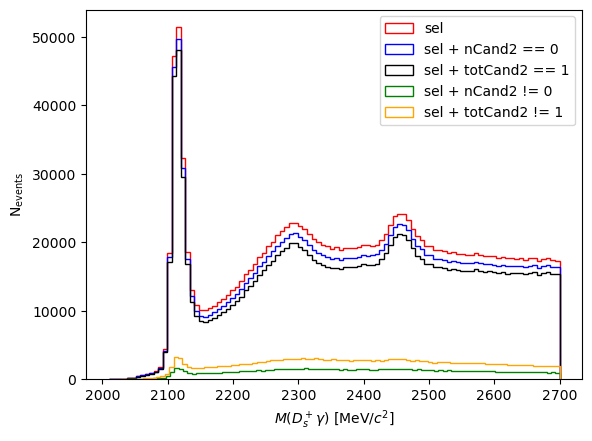

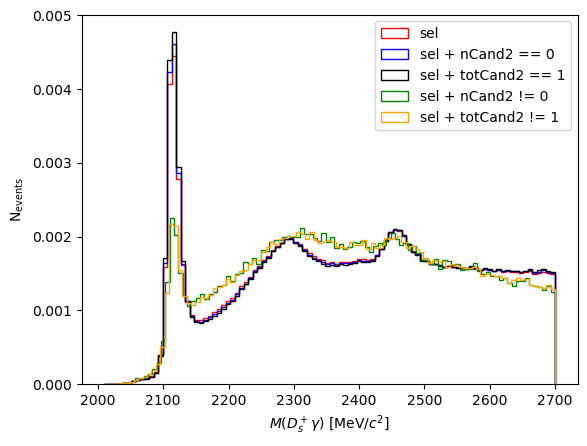

In [ ]:
df_data_sel = rsh.rdf_to_pdf(tdf_data_sel, columns=["eventNumber", "Ds_M", "gamma_PT", "DsgM", "totCandidates2", "nCandidate2"])

plt.figure(1)
plt.hist(df_data_sel["DsgM"], bins=100, histtype="step", color = "red", label="sel")
plt.hist((df_data_sel.query("nCandidate2 == 0"))["DsgM"], bins=100, histtype="step", color = "blue", label="sel + nCand2 == 0")
plt.hist((df_data_sel.query("totCandidates2 == 1"))["DsgM"], bins=100, histtype="step", color = "black", label="sel + totCand2 == 1")
plt.hist((df_data_sel.query("nCandidate2 != 0"))["DsgM"], bins=100, histtype="step", color = "green", label="sel + nCand2 != 0")
plt.hist((df_data_sel.query("totCandidates2 != 1"))["DsgM"], bins=100, histtype="step", color = "orange", label="sel + totCand2 != 1")
plt.xlabel(r"$M(D_s^+\gamma)$ [MeV/$c^2$]")
plt.ylabel(r"$\mathrm{N_{events}}$")
plt.legend()
plt.savefig("Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_cands_cut_p.pdf", dpi=300, bbox_inches="tight")

plt.figure(2)
plt.hist(df_data_sel["DsgM"], bins=100, histtype="step", color = "red", density=True, label="sel")
plt.hist((df_data_sel.query("nCandidate2 == 0"))["DsgM"], bins=100, histtype="step", color = "blue", density=True, label="sel + nCand2 == 0")
plt.hist((df_data_sel.query("totCandidates2 == 1"))["DsgM"], bins=100, histtype="step", color = "black", density=True, label="sel + totCand2 == 1")
plt.hist((df_data_sel.query("nCandidate2 != 0"))["DsgM"], bins=100, histtype="step", color = "green", density=True, label="sel + nCand2 != 0")
plt.hist((df_data_sel.query("totCandidates2 != 1"))["DsgM"], bins=100, histtype="step", color = "orange", density=True, label="sel + totCand2 != 1")
plt.xlabel(r"$M(D_s^+\gamma)$ [MeV/$c^2$]")
plt.ylabel(r"$\mathrm{N_{events}}$")
plt.legend()
plt.savefig("Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_cands_cut_norm_p.pdf", dpi=300, bbox_inches="tight")

df_data_sel

#### $\texttt{totCandidates2} == 2$ events check

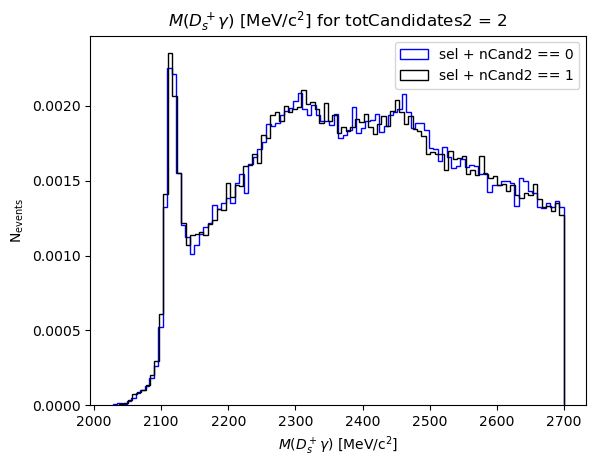

In [ ]:
df_data_sel_ntot_2 = df_data_sel.query("totCandidates2 == 2")
df_data_sel_ntot_2_0 = df_data_sel_ntot_2.query("nCandidate2 == 0")
df_data_sel_ntot_2_1 = df_data_sel_ntot_2.query("nCandidate2 == 1")

plt.figure(2)
plt.hist(df_data_sel_ntot_2_0["DsgM"], bins=100, histtype="step", color = "blue", density=True, label="sel + nCand2 == 0")
plt.hist(df_data_sel_ntot_2_1["DsgM"], bins=100, histtype="step", color = "black", density=True, label="sel + nCand2 == 1")
plt.xlabel(r"$M(D_s^+\gamma)$ $\mathrm{[MeV/c^2]}$")
plt.ylabel(r"$\mathrm{N_{events}}$")
plt.title(r"$M(D_s^+\gamma)$ $\mathrm{[MeV/c^2]}$ for totCandidates2 = 2")
plt.legend()
plt.savefig("Graphs/Exp_MagU18_DsgL_Dsg_mass_totCand2.pdf", dpi=300, bbox_inches='tight')

In [ ]:
mass_diff = np.array(df_data_sel_ntot_2_0["DsgM"]) - np.array(df_data_sel_ntot_2_1["DsgM"])

plt.figure(1)
plt.hist(mass_diff, bins = 100, histtype="step", color="blue")
plt.xlabel(r"$M_{nCand2=0}(D_s^+\gamma)-M_{nCand2=1}(D_s^+\gamma)$ $\mathrm{[MeV/c^2]}$")
plt.ylabel(r"$\mathrm{N_{events}}$")
plt.title(r"Mass difference for totCandidates2 = 2 events")
plt.savefig("Graphs/Exp_MagU18_DsgL_Dsg_mass_dif_totCand2.pdf", dpi=300, bbox_inches='tight')

In [ ]:
mass_diff_dic = {"DsgM_nCand2_0": np.array(df_data_sel_ntot_2_0["DsgM"]),
                 "DsgM_nCand2_1": np.array(df_data_sel_ntot_2_1["DsgM"]),
                 "DsgM_difference": mass_diff,        
                 "Ds_M_nCand2_0": np.array(df_data_sel_ntot_2_0["Ds_M"]),
                 "Ds_M_nCand2_1": np.array(df_data_sel_ntot_2_1["Ds_M"]),
                 "gamma_PT_nCand2_0": np.array(df_data_sel_ntot_2_0["gamma_PT"]),
                 "gamma_PT_nCand2_1": np.array(df_data_sel_ntot_2_1["gamma_PT"]),
                 }

df_mass_diff = pd.DataFrame(mass_diff_dic)

In [ ]:
df_mass_diff.query("abs(DsgM_difference) < 5")

DsgM_nCand2_0  DsgM_nCand2_1  DsgM_difference  Ds_M_nCand2_0  \
7         2280.569651    2285.523230        -4.953579    1962.573374   
8         2549.089878    2553.227590        -4.137712    1985.383275   
19        2464.998290    2464.914369         0.083921    1974.204333   
26        2434.207889    2433.330466         0.877423    1970.487186   
31        2164.943158    2164.138671         0.804487    1967.327629   
...               ...            ...              ...            ...   
111381    2103.924773    2104.576961        -0.652189    1971.625725   
111382    2483.362776    2479.864248         3.498528    1977.433564   
111414    2554.525349    2551.593907         2.931442    1965.916008   
111462    2678.243418    2680.901726        -2.658308    1973.520268   
111497    2370.393127    2374.506824        -4.113697    1969.780000   

        Ds_M_nCand2_1  gamma_PT_nCand2_0  gamma_PT_nCand2_1  
7         1968.400620        1735.072148        1735.072148  
8         1985.383275        1234.554097        1351.890018  
19        1973.796849        1467.384829        1467.384829  
26        1970.487186        3377.574153        1257.998895  
31        1967.327629        2089.607196        1665.030042  
...               ...                ...                ...  
111381    1962.760238        1452.458223        1452.458223  
111382    1977.433564        2328.047126        1219.556066  
111414    1960.025510        2157.246013        2157.246013  
111462    1978.943215        1290.524675        1290.524675  
111497    1969.780000        1211.827865        1511.672901  

[4522 rows x 7 columns]

In [ ]:
df_mass_diff.query("gamma_PT_nCand2_0 == gamma_PT_nCand2_1")

DsgM_nCand2_0  DsgM_nCand2_1  DsgM_difference  Ds_M_nCand2_0  \
7         2280.569651    2285.523230        -4.953579    1962.573374   
19        2464.998290    2464.914369         0.083921    1974.204333   
24        2288.228649    2383.430842       -95.202193    1970.565338   
41        2566.890625    2565.586232         1.304394    1979.754909   
43        2229.954513    2213.784690        16.169822    1963.015474   
...               ...            ...              ...            ...   
111421    2249.356419    2309.060186       -59.703767    1974.067121   
111431    2446.332786    2467.310313       -20.977527    1956.118158   
111462    2678.243418    2680.901726        -2.658308    1973.520268   
111483    2412.963774    2402.182740        10.781034    1966.694435   
111485    2219.881865    2231.761287       -11.879422    1974.007345   

        Ds_M_nCand2_1  gamma_PT_nCand2_0  gamma_PT_nCand2_1  
7         1968.400620        1735.072148        1735.072148  
19        1973.796849        1467.384829        1467.384829  
24        1962.773293        2093.524476        2093.524476  
41        1971.947007        1304.893728        1304.893728  
43        1980.815678        1821.911655        1821.911655  
...               ...                ...                ...  
111421    1959.184907        1303.062086        1303.062086  
111431    1969.306858        1276.693908        1276.693908  
111462    1978.943215        1290.524675        1290.524675  
111483    1971.885139        1207.257724        1207.257724  
111485    1974.967025        1356.822573        1356.822573  

[5700 rows x 7 columns]

### nCandidate2 computing (TTree way)

In [ ]:
def MultipleCands(ttree, histo_mono, histo_multi):
    
    nentries = ttree.GetEntries()
    aux = []
    count_dup = 0
    count_sel = 0
    
    for i in range(nentries):
        ttree.GetEntry(i)               
        evtN = ttree.eventNumber
        runN = ttree.runNumber
        Ds_M = ttree.Ds_M
        g_PT = ttree.gamma_PT
        g_CL = ttree.gamma_CL
        nPVs = ttree.nPVs
        DsgM = ttree.Dsg_M - Ds_M + 1969
        
        if abs(Ds_M-1969) < 20 and g_PT > 1200 and g_CL > 0.7 and nPVs == 1 and DsgM < 2700:
            count_sel += 1
            pair = (runN, evtN)
            if pair not in aux:
                aux.append(pair)
                histo_mono.Fill(DsgM)
            else:
                count_dup += 1
                histo_multi.Fill(DsgM)
                
    return count_sel, count_dup, histo_mono, histo_multi

In [ ]:
files = [Data_path+"DsJ_Data_MagD18_{0}.root".format(i+400) for i in range(50)]

ndup = 0; nsel = 0

Dsg_mass_hist_monocand = ROOT.TH1D("", "", 100, 2000, 2700)
Dsg_mass_hist_multicand = ROOT.TH1D("", "", 100, 2000, 2700)

for x in files:
    file = ROOT.TFile(x, "READ")
    ttree = file.Get(dtt+"/DecayTree")

    count_sel, count_dup, Dsg_mass_hist_monocand, Dsg_mass_hist_multicand = MultipleCands(ttree, Dsg_mass_hist_monocand, Dsg_mass_hist_multicand)
    
    nsel += count_sel
    ndup += count_dup
    file.Close()

In [ ]:
print("Number of entries after selection: {0}".format(nsel))
print("Number of duplicates: {0}".format(ndup))
print("ratio duplicates/total: {0} %".format(100*ndup/nsel))

c1 = ROOT.TCanvas()
rsh.TH1D_plot(Dsg_mass_hist_monocand, color=1)
rsh.TH1D_plot(Dsg_mass_hist_multicand, color=2)
c1.Draw()

Number of entries after selection: 88435
Number of duplicates: 6238
ratio duplicates/total: 7.053768304404365 %


### Both methods comparison

In [ ]:
RDF_Dsg_mass_hist_monocand = tdf_data_sel.Filter("nCandidate2 == 0").Histo1D(("", "", 100, 2000, 2700), "DsgM")
RDF_Dsg_mass_hist_multicand = tdf_data_sel.Filter("nCandidate2 != 0").Histo1D(("", "", 100, 2000, 2700), "DsgM")

In [ ]:
c1 = ROOT.TCanvas()
lgd = ROOT.TLegend(0.57, 0.58, 0.90, 0.88)
rsh.TH1D_plot(Dsg_mass_hist_monocand, xlabel="Dsg mass", color=1)
rsh.TH1D_plot(RDF_Dsg_mass_hist_monocand, xlabel="Dsg mass", color=1, opt="E same")
rsh.TH1D_plot(Dsg_mass_hist_multicand, xlabel="Dsg mass", color = 2)
rsh.TH1D_plot(RDF_Dsg_mass_hist_multicand, xlabel="Dsg mass", color=2, opt = "E same")
rsh.legend_plot(lgd, [Dsg_mass_hist_monocand, RDF_Dsg_mass_hist_monocand.GetPtr()],
                ["No RDF method", "RDF method"], ["l", "p"])
c1.Draw()
c1.SaveAs("Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_ncands_meth_comp.pdf")


c2 = ROOT.TCanvas()
lgd2 = ROOT.TLegend(0.57, 0.58, 0.90, 0.88)
rsh.TH1D_plot(Dsg_mass_hist_monocand, xlabel="Dsg mass",  color=1, norm=True)
rsh.TH1D_plot(RDF_Dsg_mass_hist_monocand, xlabel="Dsg mass",  color=1, opt="E same", norm=True)
rsh.TH1D_plot(Dsg_mass_hist_multicand, xlabel="Dsg mass",  color=2, norm=True)
rsh.TH1D_plot(RDF_Dsg_mass_hist_multicand, xlabel="Dsg mass",  color=2, opt = "E same", norm=True)
rsh.legend_plot(lgd2, [Dsg_mass_hist_monocand, RDF_Dsg_mass_hist_monocand.GetPtr()],
                ["No RDF method", "RDF method"], ["l", "p"])
c2.Draw()
c2.SaveAs("Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_ncands_meth_comp_norm.pdf")

Info in <TCanvas::Print>: pdf file Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_ncands_meth_comp.pdf has been created
Info in <TCanvas::Print>: pdf file Graphs/Exp_MagU18_DsgL_Dsg_mass_sel_ncands_meth_comp_norm.pdf has been created
